## 1. Imports


In [1]:
import sys
sys.path.append('../')
from scripts.visualization_utils import delayed_impact_bar_plot, immediate_impact_bar_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [2]:
data_path = '../results/german/german_age/'
folders= ['dt','gnb','lgr','gbt']
#folders = ['dt','gnb','gbt']

## 2. Delayed Impact plots

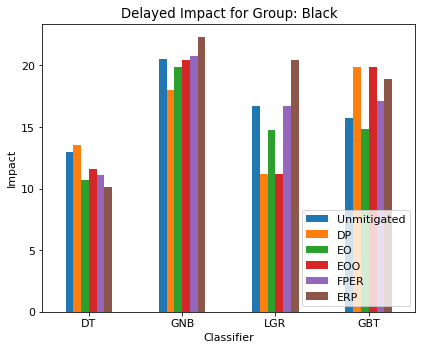

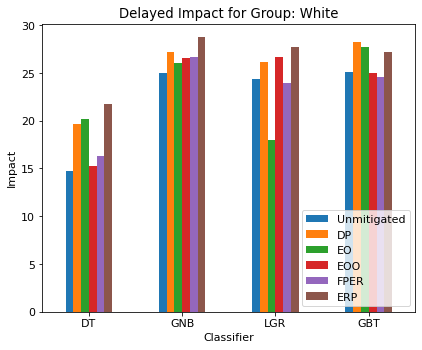

In [3]:
delayed_impact_bar_plot(data_path,'Black',['DT','GNB','LGR','GBT'])
delayed_impact_bar_plot(data_path,'White',['DT','GNB','LGR','GBT'])

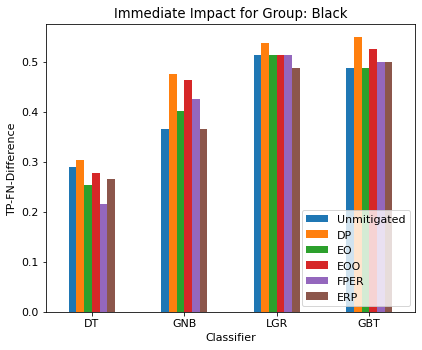

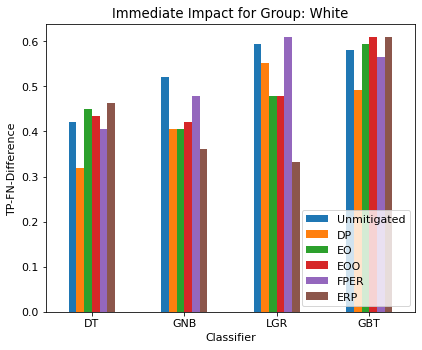

In [4]:
immediate_impact_bar_plot(data_path,'Black',['DT','GNB','LGR','GBT'])
immediate_impact_bar_plot(data_path,'White',['DT','GNB','LGR','GBT'])

## 3. MWU p-Test results

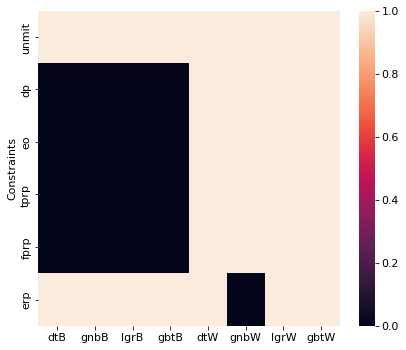

In [6]:
path_b = f'{data_path}mwu/p_un_vs_miti_B.csv'
df_b = pd.read_csv(path_b)
df_b = df_b.set_index('Constraints')
df_b[df_b >= 0.05] = 1
df_b[df_b < 0.05] = 0
path_w = f'{data_path}mwu/p_un_vs_miti_W.csv'
df_w = pd.read_csv(path_w)
df_w = df_w.set_index('Constraints')
df_w[df_w >= 0.05] = 1
df_w[df_w < 0.05] = 0
df = pd.concat([df_b,df_w], axis= 1)
sns.heatmap(df)
plt.savefig(f'{data_path}plot_un_vs_mit_sig.png')

## 4. Impact plots all SynSets

In [10]:
# Absolute numbers
dataset_folder = ['00', 'b0','i0', '0b','bb','ib','0i','bi','ii']
#dataset_folder = ['00', 'b0','i0']
#dataset_folder = ['00', '0b','0i']
parent_path = '../results/syn_raw/'

constraints = ['Unmitigated','DP','EO','EOO', 'FPER', 'ERP']
#classifier = ['DT','GNB','LGR','GBT']
classifier = ['DT']

C:\Users\HaRi\AppData\Local\Temp\ipykernel_25060\34144401.py:29: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(f'{parent_path}DI_syn_dt.png')


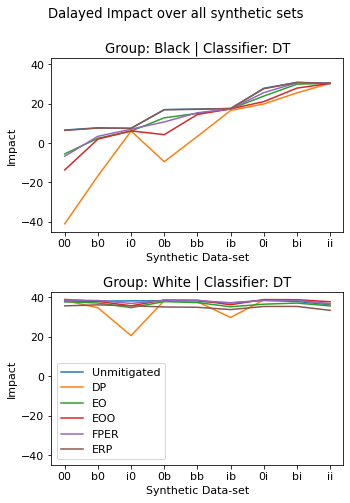

In [12]:
fig, axs = plt.subplots(ncols=len(classifier), nrows=2, figsize=(5,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Dalayed Impact over all synthetic sets')
for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/Black_DI.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[0].set_title(f'Group: Black | Classifier: {m}')
        axs[0].plot(dataset_folder,line,label = c)

for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/White_DI.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[1].set_title(f'Group: White | Classifier: {m}')
        axs[1].plot(dataset_folder,line,label = c)
for ax in axs.flat:
    ax.set(xlabel='Synthetic Data-set', ylabel='Impact')
    
plt.legend()
plt.savefig(f'{parent_path}DI_syn_dt.png')
plt.show()


C:\Users\HaRi\AppData\Local\Temp\ipykernel_25060\424630781.py:29: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(f'{parent_path}I_syn_dt.png')


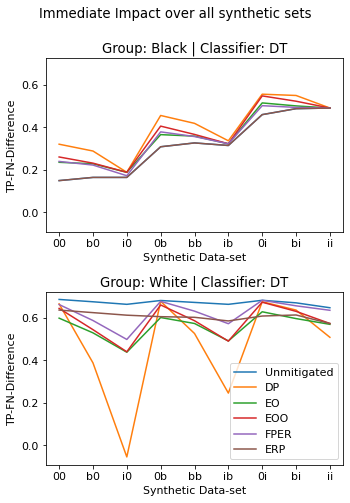

In [13]:
fig, axs = plt.subplots(ncols=len(classifier), nrows=2, figsize=(5,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Immediate Impact over all synthetic sets')
for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/Black_I.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[0].set_title(f'Group: Black | Classifier: {m}')
        axs[0].plot(dataset_folder,line,label = c)

for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/White_I.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[1].set_title(f'Group: White | Classifier: {m}')
        axs[1].plot(dataset_folder,line,label = c)
for ax in axs.flat:
    ax.set(xlabel='Synthetic Data-set', ylabel='TP-FN-Difference')
    
plt.legend()
plt.savefig(f'{parent_path}I_syn_dt.png')
plt.show()


## 5. Delayed Impact plots over DI distribution

In [ ]:
# Absolute numbers

dataset_folder = ['std15_m75,150', 'std15_m100','std15_m150,75']
parent_path = '../results/base_distris/'

constraints = ['Unmitigated','DP','EO','EOO', 'FPER', 'ERP']
#classifier = ['DT','GNB','LGR','GBT']
classifier = ['DT']

In [ ]:
fig, axs = plt.subplots(ncols=len(classifier), nrows=2, figsize=(4,7),
                        constrained_layout=True,sharex=False, sharey=True)
fig.suptitle('Dalayed Impact for vaious setups')
for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/Black_DI.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[0].set_title(f'Group: Black | Classifier: {m}')
        axs[0].scatter(['[-150,75]','[-100,100]','[-75,150]'],line,label = c)

for i,m in enumerate(classifier):
    for c in constraints:
        line = []
        for _,ds_f in enumerate(dataset_folder):
            path = f'{parent_path}{ds_f}/White_DI.csv'
            df = pd.read_csv(path)
            df = df.set_index('Constraint')
            line.append(df.loc[c,m])
        axs[1].set_title(f'Group: White | Classifier: {m}')
        axs[1].scatter(['[-150,75]','[-100,100]','[-75,150]'],line,label = c)
for ax in axs.flat:
    ax.set(xlabel='Mean of Delayed Impact distr. ([FP,TP])', ylabel='Impact')
    
plt.legend()
plt.savefig(f'{parent_path}DI_setups_dt.png')
plt.show()
